<a href="https://colab.research.google.com/github/Ansarabbas4200/Deep_Learning/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goal is to create some fake images using fashion mnist data. 

In [19]:
# Import Libraries
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Dense, Reshape, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between -1 and 1
X_train = X_train.astype('float32') / 255.0
X_train = np.expand_dims(X_train, axis=-1)

In [21]:
# Define the Generator model
generator = Sequential()
generator.add(Dense(7*7*256, input_dim=100))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Reshape((7, 7, 256)))
generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2DTranspose(1, (7, 7), activation='sigmoid', padding='same'))


In [22]:
# Define the Discriminator model
discriminator = Sequential()
discriminator.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

In [23]:
# Combine the Generator and Discriminator 
gan = Sequential()
gan.add(generator)
gan.add(discriminator)


In [28]:
# Compile the Discriminator model
discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

In [30]:
# Compile the GAN model
gan.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

In [31]:
# Define function to generate fake images
def generate_fake_images(generator, num_images):
    noise = np.random.normal(0, 1, size=(num_images, 100))
    fake_images = generator.predict(noise)
    return fake_images


In [32]:
# Train the GAN model
epochs = 1000
batch_size = 128

for epoch in range(epochs):
    # Train Discriminator
    real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
    real_labels = np.ones((batch_size, 1))
    fake_images = generate_fake_images(generator, batch_size)
    fake_labels = np.zeros((batch_size, 1))
    discriminator_loss_real = discriminator.train_on_batch(real_images, real_labels)
    discriminator_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)
    
    # Train Generator
    noise = np.random.normal(0, 1, size=(batch_size, 100))
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
    
    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}')

4/4 [==============================] - 1s 122ms/step
Epoch: 0, Discriminator Loss: 0.7108139395713806, Generator Loss: 0.6971654891967773
4/4 [==============================] - 0s 120ms/step
Epoch: 100, Discriminator Loss: 0.5621894635260105, Generator Loss: 0.7471903562545776
4/4 [==============================] - 1s 157ms/step
Epoch: 200, Discriminator Loss: 0.7946628779172897, Generator Loss: 0.4720492959022522
4/4 [==============================] - 1s 194ms/step
Epoch: 300, Discriminator Loss: 0.8517341166734695, Generator Loss: 0.42534101009368896
4/4 [==============================] - 0s 120ms/step
Epoch: 400, Discriminator Loss: 0.7966016530990601, Generator Loss: 0.5098327994346619
4/4 [==============================] - 0s 119ms/step
Epoch: 500, Discriminator Loss: 0.7866747081279755, Generator Loss: 0.633827269077301
4/4 [==============================] - 0s 119ms/step
Epoch: 600, Discriminator Loss: 0.8305419385433197, Generator Loss: 0.493702232837677
4/4 [==================

1/1 [==============================] - 0s 206ms/step


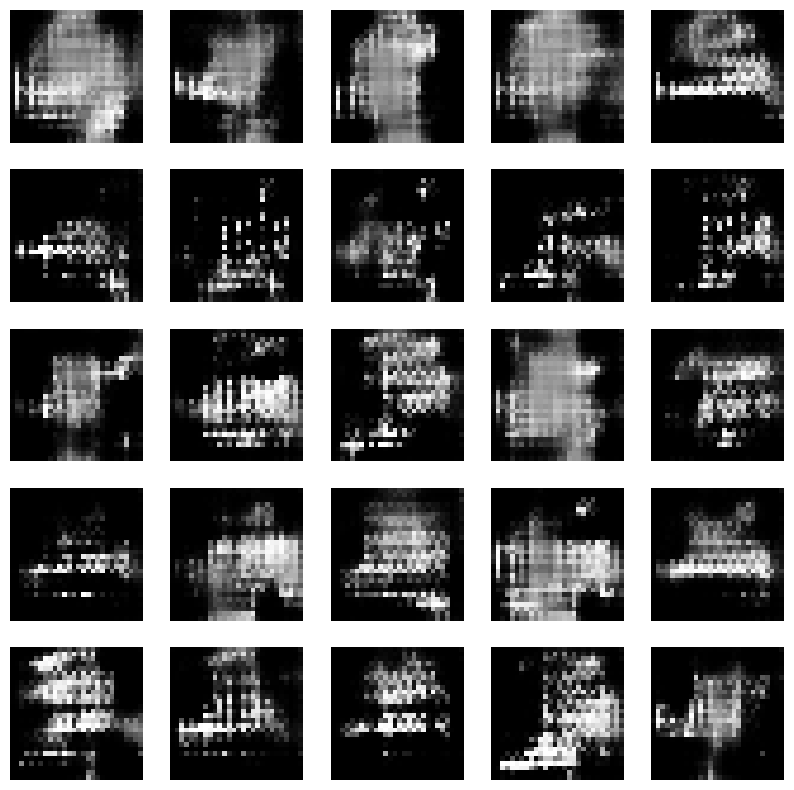

In [33]:
# Generate fake images
num_fake_images = 25
fake_images = generate_fake_images(generator, num_fake_images)
fake_images = 0.5 * fake_images + 0.5
fake_images = fake_images.reshape((num_fake_images, 28, 28))

# Plot fake images
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()
for i in range(num_fake_images):
    axs[i].imshow(fake_images[i], cmap='gray')
    axs[i].axis('off')
plt.show()


### This model tried to create some fake images from mnist fashion dataset. Number of epochs were only thousand that's why model is not much accurate as expected